In [11]:
import pandas as pd
import numpy as np

# If the file has comment lines at the top, use comment='#'
df = pd.read_csv("data/q1_q17_dr25_koi_2025.05.14_22.18.22.csv", comment='#')

In [12]:
features = [
    "koi_disposition", "koi_period", "koi_impact", "koi_duration", "koi_depth",
    "koi_prad", "koi_teq", "koi_insol", "koi_model_snr",
    "koi_steff", "koi_slogg", "koi_srad"
]

df = df[features]

In [13]:
df.head()

,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad
0,CONFIRMED,2.470613,0.818,1.74319,14230.9,13.04,1339.0,761.46,4304.3,5820.0,4.457,0.964
1,CONFIRMED,2.204735,0.224,3.88864,6674.7,16.10,2048.0,4148.92,5945.9,6440.0,4.019,1.952
2,CONFIRMED,4.887803,0.054,2.36255,4315.8,4.82,800.0,96.67,862.3,4778.0,4.591,0.763
3,CONFIRMED,3.849372,0.915,2.63200,1298.6,12.94,2034.0,4055.29,132.7,6244.0,3.657,2.992
4,CANDIDATE,4.780328,0.952,2.02530,960.8,7.14,1441.0,1020.05,380.8,5937.0,4.012,1.787


In [14]:
# Drop rows with any missing values
df_clean = df.dropna()

In [15]:
labels = df_clean["koi_disposition"]
features = df_clean.drop("koi_disposition", axis=1)

In [16]:
input_length = 11   

In [17]:
# Scale
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

In [18]:
# Reshape for Conv1D
X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))  # (4599, 11, 1)

In [19]:

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(labels) 

In [20]:
# Convert labels to one-hot if using softmax output
num_classes = len(np.unique(y_encoded))
y_categorical = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

In [21]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_categorical, test_size=0.2, random_state=42)

In [22]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build the model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_length, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax') 
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100


/home/mehnoor/Projects/exoplanet-detection/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1747296032.597740   27847 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5353 - auc: 0.7161 - loss: 1.0934 - precision: 0.5827 - recall: 0.4369 - val_accuracy: 0.4816 - val_auc: 0.6504 - val_loss: 1.5948 - val_precision: 0.4816 - val_recall: 0.4816 - learning_rate: 0.0010
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6238 - auc: 0.7904 - loss: 0.8545 - precision: 0.7089 - recall: 0.4627 - val_accuracy: 0.4816 - val_auc: 0.7100 - val_loss: 1.5360 - val_precision: 0.4816 - val_recall: 0.4816 - learning_rate: 0.0010
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6444 - auc: 0.8064 - loss: 0.8274 - precision: 0.7195 - recall: 0.4895 - val_accuracy: 0.6316 - val_auc: 0.7996 - val_loss: 0.8334 - val_precision: 0.6829 - val_recall: 0.4309 - learning_rate: 0.0010
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6584 - auc: 0.8174 - loss: 0.8051 - precision: 0.7252 - recall: 0.5295 - val_accuracy: 0.6842 - val_auc: 0.8467 - val_loss: 0.7671 - val_precisi

In [23]:
results = model.evaluate(X_test, y_test, verbose=0)
for name, val in zip(model.metrics_names, results):
    print(f"{name}: {val:.4f}")


loss: 0.5053
compile_metrics: 0.8099


In [24]:
y_pred_probs = model.predict(X_test)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Extract probabilities for the positive class
y_test_labels = y_test[:, 1]          # actual class labels
y_score = y_pred_probs[:, 1]          # predicted probabilities for class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_labels, y_score)
roc_auc = auc(fpr, tpr)


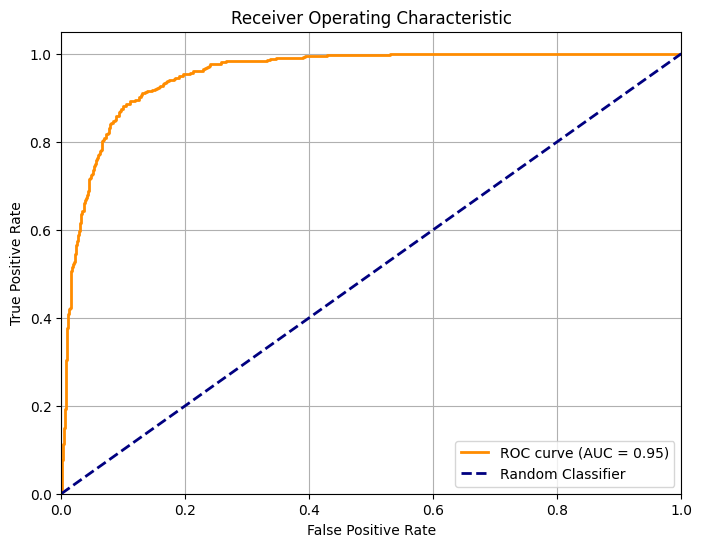

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
